In [1]:
from classMVA import MVA
import numpy as np
import matplotlib.pyplot as plt

[[   0.     0.3    0. ]
 [   0.     0.     0. ]
 [   0.     0.     0. ]
 [   0.4    0.3    0. ]
 [   0.5    0.3  100. ]
 [   0.     0.     0. ]
 [   0.     0.     0. ]]


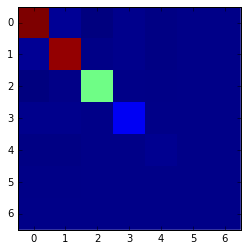

In [2]:
X = np.random.randn(5000,7) * np.array([1, 1, np.sqrt(0.5), np.sqrt(0.1), np.sqrt(0.01), 1e-4, 1e-4])

#Regression coefficients
R = np.array([[0, 0.3, 0],[0, 0, 0],[0, 0, 0], [0.4, 0.3, 0], [0.5, 0.3, 100], [0, 0, 0], [0, 0, 0]])

print R

Y = X.dot(R) + np.sqrt(1e-3)*np.random.randn(5000,3)

plt.imshow(X.T.dot(X), interpolation='none')
plt.show()

[[ 1.   0.   0.   0.3  0.   0.   0. ]
 [ 0.   1.   0.   0.   0.   0.   0. ]
 [ 0.   0.   1.   0.   0.   0.8  0. ]
 [ 0.   0.   0.   1.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1.   0.   0. ]
 [ 0.   0.   0.   0.   0.   1.   0. ]
 [ 0.   0.   0.   0.   0.   0.   1. ]]


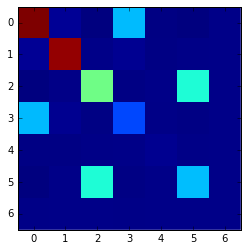

In [3]:
#Finally, we mix a little bit some coordinates:
W = np.eye(7,7)
W[0,3] = .3
W[2,5] = .8
print W
X2 = X.dot(W)
plt.imshow(X2.T.dot(X2), interpolation='none')
plt.show()

In [4]:

RDD_X = sc.parallelize(X2.tolist())
RDD_Y = sc.parallelize(Y.tolist())

RDD_labeled = RDD_Y.zip(RDD_X)

print RDD_X.count()
print RDD_Y.count()
print RDD_labeled.count()

print RDD_X.first()
print RDD_Y.first()
print RDD_labeled.first()


5000
5000
5000
[1.1547565171114191, 0.3181660881474078, -1.2723047024508733, 0.38891256912866135, 0.01065705553788321, -1.0179807530869944, 7.768683268566467e-05]
[0.0020226776609871787, 0.40818582643410717, 1.043476514835448]
([0.0020226776609871787, 0.40818582643410717, 1.043476514835448], [1.1547565171114191, 0.3181660881474078, -1.2723047024508733, 0.38891256912866135, 0.01065705553788321, -1.0179807530869944, 7.768683268566467e-05])


In [5]:
#PCA example
prueba = MVA('PCA','l1','None',1e-5,7,0.0000001,1e-3,100)
RDD_PCA = RDD_labeled.map(lambda x: x[1])
prueba.prepareData(RDD_PCA)
prueba.normalizer()

In [6]:
print prueba._typeMVA
print prueba._typeReg
print prueba._typeNorm
print prueba._tol
print prueba._numVariables
print prueba._M
print prueba._data.take(2)
print prueba._normdata.take(2)
print prueba._scaler
print prueba._U
print prueba._max_Ustep

PCA
l1
None
1e-05
7
7
[(DenseVector([1.1548, 0.3182, -1.2723, 0.3889, 0.0107, -1.018, 0.0001]), DenseVector([1.1548, 0.3182, -1.2723, 0.3889, 0.0107, -1.018, 0.0001])), (DenseVector([-2.461, 0.4494, 0.0867, -0.7723, 0.0272, 0.0694, -0.0001]), DenseVector([-2.461, 0.4494, 0.0867, -0.7723, 0.0272, 0.0694, -0.0001]))]
[(DenseVector([1.1624, 0.3185, -1.2673, 0.389, 0.0072, -1.014, 0.0001]), DenseVector([1.1624, 0.3185, -1.2673, 0.389, 0.0072, -1.014, 0.0001])), (DenseVector([-2.4534, 0.4497, 0.0918, -0.7722, 0.0238, 0.0734, -0.0001]), DenseVector([-2.4534, 0.4497, 0.0918, -0.7722, 0.0238, 0.0734, -0.0001]))]
None
10


In [14]:
prueba = MVA('PCA','l1','None',1e-5,7,0.001,1e-3,100)
prueba.fit(RDD_PCA)
print prueba._U

(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
Frobenius norm error: 0.00239005254009
(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
Frobenius norm error: 3.98245914215e-06
[[ -1.82840411e-03  -2.14136985e-04   5.00396795e-05  -6.09691805e-04
    0.00000000e+00   3.96909973e-05  -0.00000000e+00]
 [  1.81029760

In [15]:
#RDD_NEW= RDD_PCA.map(lambda x: x.dot(((self._U).T))).collect()
RDD_NEW=prueba.predict(RDD_PCA)
print RDD_NEW.count()
print RDD_NEW.take(2)
print RDD_NEW.first()

5000
[array([ -2.53436531e-03,  -2.65800377e-04,   2.19742451e-03,
        -1.65259396e-06,  -1.08817227e-07,   0.00000000e+00]), array([  4.86772254e-03,  -1.25674436e-03,  -3.32138326e-05,
        -3.69165137e-06,  -3.57484155e-07,   0.00000000e+00])]
[ -2.53436531e-03  -2.65800377e-04   2.19742451e-03  -1.65259396e-06
  -1.08817227e-07   0.00000000e+00]


In [16]:
RDD2 = prueba._scaler.transform(RDD_PCA)

U = prueba._U
sc.broadcast(U)
RDD2 = RDD2.map(lambda x: x.dot(((U).T)))

print RDD2.first()

#print RDD2.count()
#print RDD2.take(2)

[ -2.53436531e-03  -2.65800377e-04   2.19742451e-03  -1.65259396e-06
  -1.08817227e-07   0.00000000e+00]


In [17]:
def sum_matrix(matriz,n,m):
    for i in range(n):
        suma=0.00000000e+00
        for j in range(m):
            suma=suma+np.abs(matriz[i][j])
            print np.abs(matriz[i][j])
    
    return suma

[[  0.00000000e+00   7.19752131e-06  -1.46624029e-05   1.37536385e-05
   -1.35356864e-07   0.00000000e+00]
 [  7.19752131e-06   0.00000000e+00   7.88628649e-06   3.96251366e-06
   -7.28192783e-08   0.00000000e+00]
 [ -1.46624029e-05   7.88628649e-06   0.00000000e+00   6.03623412e-07
   -9.41918509e-09   0.00000000e+00]
 [  1.37536385e-05   3.96251366e-06   6.03623412e-07   0.00000000e+00
    4.17459360e-10   0.00000000e+00]
 [ -1.35356864e-07  -7.28192783e-08  -9.41918509e-09   4.17459360e-10
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]
0.0
7.19752131178e-06
1.46624029418e-05
1.37536385332e-05
1.35356863803e-07
7.19752131178e-06
0.0
7.88628649209e-06
3.96251365968e-06
7.28192782789e-08
1.46624029418e-05
7.88628649209e-06
0.0
6.03623412444e-07
9.41918508858e-09
1.37536385332e-05
3.96251365968e-06
6.03623412444e-07
0.0
4.17459360476e-10
1.35356863803e-07
7.28192782789e-08
9.41918508858e-09

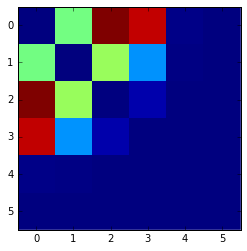

In [18]:
#BLANQUEADO DE DATOS

X_2=(X2).dot(U.T)
Cov=X_2.T.dot(X_2)
MM=np.diagonal(Cov).reshape(1,6)
from scipy import sparse
diag=sparse.spdiags(MM,0,6,6).toarray()
#print diag
fin=Cov-diag
print fin
#print fin[0][1]
suma=sum_matrix(fin,5,5)
print 'suma= ' + str(suma) 
plt.imshow(np.abs(fin), interpolation='none')
plt.show()

[[  7.75447806e-08   7.48123798e-10   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  7.48123798e-10   5.14681913e-08   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


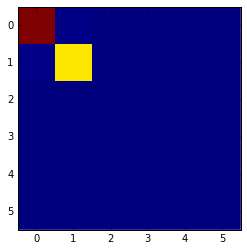

In [63]:
matrix = RDD2.map(lambda x : np.dot(x[:,np.newaxis],x[:,np.newaxis].T)).mean()
print matrix
#X_2=(X2).dot(U.T)
plt.imshow(matrix, interpolation='none')
plt.show()

In [33]:
from operator import add
def count_0s (array):
    cuenta=0
    for i in range(len(array)):
        if array[i] > 1e-4 :
            cuenta=cuenta+1
    return cuenta

#array= [  1.02782977e-03 ,  1.54021761e-04 , -1.67806562e-03 , -4.35857479e-05, -2.32505213e-06, 0.00000000e+00]

#cuenta=count_0s(array)
#print cuenta
number_0s=RDD2.map(lambda x: ('zero',count_0s(x)))
number=number_0s.reduceByKey(add)
print number_0s.take(8)
print number.collect()

[('zero', 2), ('zero', 0), ('zero', 2), ('zero', 2), ('zero', 0), ('zero', 1), ('zero', 2), ('zero', 2)]
[('zero', 7183)]


In [7]:
#self, typeMVA, typeReg,typeNorm, tol, regParam=0.01, step=1e-3, iterations=100, max_Ustep=10):
prueba = MVA('PCA','l1','None',1e-5,7,0.00000001,1e-3,100)
prueba.fit(RDD_PCA)
print prueba._U

(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
Frobenius norm error: 0.00441065195743
(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
Frobenius norm error: 0.00437217878989
(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 

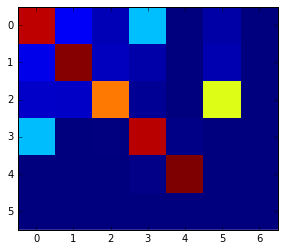

In [8]:
from sklearn import preprocessing

plt.imshow(np.abs(preprocessing.normalize(prueba._U, norm='l2')), interpolation='none')
plt.show()


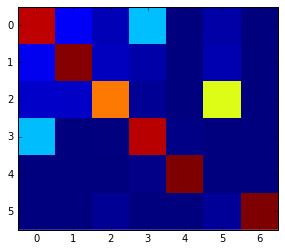

In [9]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=6)
pca.fit(RDD_PCA.collect())
plt.imshow(np.abs(pca.components_), interpolation='none')
plt.show()

In [31]:
prueba1 = MVA('PCA','l1','None',1e-5,7,0.0001,1e-2,100)
prueba1.fit(RDD_PCA)

(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
Frobenius norm error: 0.0231243506135
(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
Frobenius norm error: 0.00608807147103
(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6

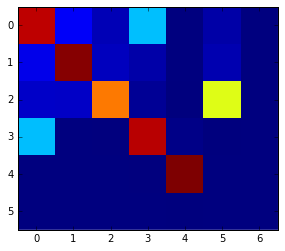

In [16]:

plt.imshow(np.abs(preprocessing.normalize(prueba._U, norm='l2')), interpolation='none')
plt.show()

In [32]:
prueba2 = MVA('PCA','l1','None',1e-5,7,0.01,1e-2,100)
prueba2.fit(RDD_PCA)

(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
Frobenius norm error: 0.378855631488
(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
Frobenius norm error: 0.0148666605533
(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
E

In [33]:
prueba3 = MVA('PCA','l1','None',1e-5,7,0.1,1e-2,100)
prueba3.fit(RDD_PCA)

(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
Frobenius norm error: 0.00396112745111
(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
Frobenius norm error: 0.0013907111606
(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6

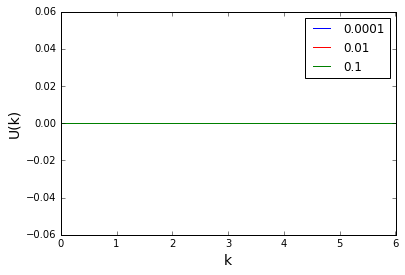

In [44]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(abs(prueba1._U.T[:,5]),'b',label='0.0001')
plt.hold(True)
plt.plot(abs(prueba2._U.T[:,5]),'r',label='0.01')
plt.hold(True)
plt.plot(abs(prueba3._U.T[:,5]),'g',label='0.1')

plt.legend(loc = 1)

plt.xlabel('k', fontsize=14)
plt.ylabel('U(k)', fontsize=14)


plt.show()

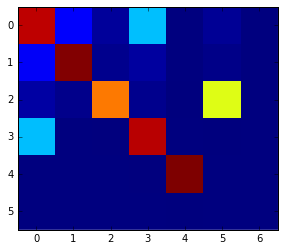

In [29]:
from sklearn import decomposition
from sklearn import preprocessing
plt.imshow(np.abs(preprocessing.normalize(prueba._U, norm='l2')), interpolation='none')
plt.show()

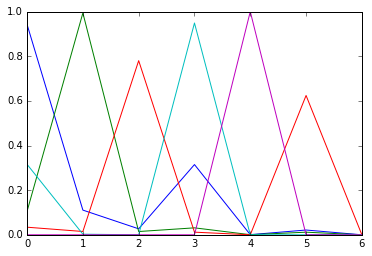

In [30]:
plt.plot(np.abs(preprocessing.normalize(prueba._U, norm='l2')).T)
plt.show()

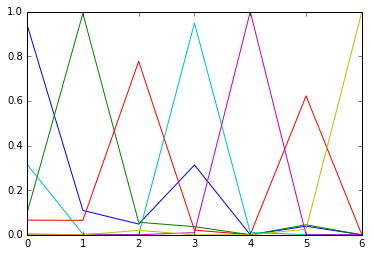

In [11]:
plt.plot(abs(pca.components_.T))
plt.show()

In [105]:
prueba = MVA('PCA','l1','None',1e-5,7,0.1,1e-3,100)
prueba.fit(RDD_PCA)

(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
Frobenius norm error: 0.00118711707341
(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
Frobenius norm error: 0.000113063072909
(6, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of

[[-0.00157569 -0.00024469 -0.         -0.00038381  0.         -0.          0.        ]
 [ 0.00020559 -0.00150568  0.          0.         -0.          0.          0.        ]
 [ 0.         -0.         -0.00087473  0.         -0.         -0.00066564
   0.        ]
 [-0.         -0.          0.          0.         -0.          0.          0.        ]
 [-0.         -0.         -0.          0.          0.         -0.         -0.        ]
 [-0.         -0.          0.          0.          0.          0.          0.        ]]


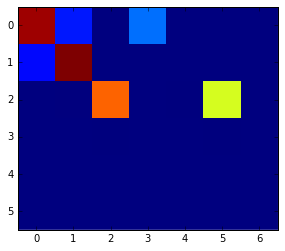

In [106]:
from sklearn import preprocessing
print prueba._U
plt.imshow(np.abs(preprocessing.normalize(prueba._U, norm='l2')), interpolation='none')
plt.show()

In [13]:
#self, typeMVA, typeReg,typeNorm, tol, regParam=0.01, step=1e-3, iterations=100, max_Ustep=10):
prueba = MVA('OPLS','l1','norm',1e-5,7)
prueba.fit(RDD_labeled)

(2, 7)
(3, 7)
(3, 3)
Extracting projection vector 0 out of 2
Extracting projection vector 1 out of 2
(2, 7)
(3, 7)
(3, 3)
Extracting projection vector 0 out of 2
Extracting projection vector 1 out of 2
Frobenius norm error: 0.158786304691
(2, 7)
(3, 7)
(3, 3)
Extracting projection vector 0 out of 2
Extracting projection vector 1 out of 2
Frobenius norm error: 0.000296042206739
(2, 7)
(3, 7)
(3, 3)
Extracting projection vector 0 out of 2
Extracting projection vector 1 out of 2
Frobenius norm error: 3.84873464957e-06


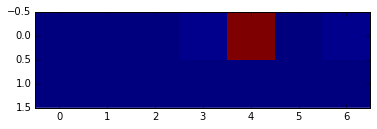

In [20]:

plt.imshow(np.abs(prueba._U), interpolation='none')
plt.show()

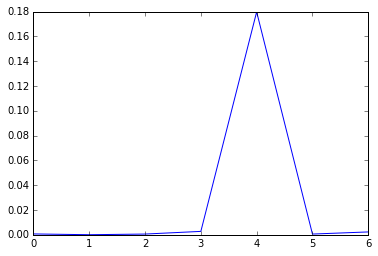

In [21]:
plt.plot(abs(prueba._U.T[:,0]))
plt.show()

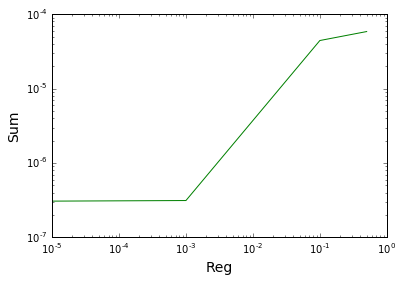

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x=[0.00001, 0.001,0.1,0.5]
y=[3.080e-7,3.137e-7,4.438e-5,5.858e-5]
plt.semilogx()
plt.semilogy()
#plt.legend(loc = 2)
plt.xlabel('Reg', fontsize=14)
plt.ylabel('Sum', fontsize=14)
plt.plot(x,y,'g')
plt.show()